In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from datetime import datetime, timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# importing csv
data = pd.read_csv('sample_data/simulation_1Year.csv',sep=',',decimal=',',index_col=0, low_memory=False)
cols = data.columns
for col in cols:
    # converting to float
    data[col] = data[col].astype(float)

time = []
for i in range(len(data.index)):
    # reading  index
    t = data.index[i]
    timestamp = datetime.strptime(t, "%Y/%m/%d  %H:%M:%S")
    time.append(timestamp)
data.index = pd.to_datetime(time)
data

,t_in,t_out,delta_t,power_heating,power_cooling,power_electricity,total_power
2017-01-01 01:00:00,19.85,4.83,15.023238,0.62,0.0,0.00,0.62
2017-01-01 02:00:00,19.85,6.13,13.718786,0.57,0.0,0.00,0.57
2017-01-01 03:00:00,19.85,6.37,13.480100,0.56,0.0,0.00,0.56
2017-01-01 04:00:00,19.84,6.12,13.721903,0.57,0.0,0.00,0.57
2017-01-01 05:00:00,19.84,6.08,13.760603,0.58,0.0,0.00,0.58
...,...,...,...,...,...,...,...
2017-12-31 20:00:00,19.84,2.18,17.660478,0.94,0.0,0.35,1.29
2017-12-31 21:00:00,19.84,2.26,17.585447,0.94,0.0,0.35,1.29
2017-12-31 22:00:00,19.84,2.34,17.501111,0.71,0.0,0.35,1.06
2017-12-31 23:00:00,19.84,2.50,17.339991,0.67,0.0,0.10,0.77


In [23]:
def es_plot(data):
  cool_d = data.where(data['power_cooling']!=0.0).dropna()
  heat_d = data.where(data['power_heating']!=0.0).dropna()
  # Fit the regression models
  model_h = sm.OLS(heat_d.power_heating,sm.add_constant(heat_d.delta_t))
  model_c = sm.OLS(cool_d.power_cooling,sm.add_constant(cool_d.delta_t))
  results_h = model_h.fit()
  results_c = model_c.fit()
  # Plot the results
  fig = plt.figure()
  plt.plot(heat_d.delta_t,results_h.predict(),'r', linewidth=1, label='Heating Regression Line')
  plt.plot(cool_d.delta_t,results_c.predict(),'k', linewidth=1, label='Cooling Regression Line')
  plt.scatter(heat_d.delta_t,heat_d.power_heating, s=2, label='Observations')
  plt.scatter(cool_d.delta_t,cool_d.power_cooling, s=2, color='C0')
  plt.xlabel('\u0394T [\u00B0C]')
  plt.ylabel('Energy Consumption [kWh]')
  plt.ylim(-0.2,1.27)
  plt.legend()

In [24]:
#%% SPLITTING DATA IN HOURLY, WEEKLY AND DAILY
data = data.dropna()
# frequency conversion according to day
dataD = data.resample('D').mean()
# removing missing values
dataD = dataD.dropna()
# frequency conversion according to week
dataW = data.resample('W').mean()
# removing missing values
dataW = dataW.dropna()
# frequency conversion according to month
dataM = data.resample('M').mean()
# removing missing values
dataM = dataM.dropna()

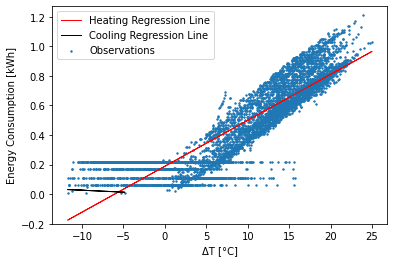

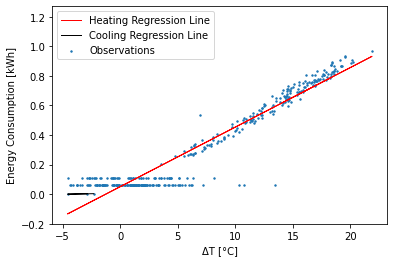

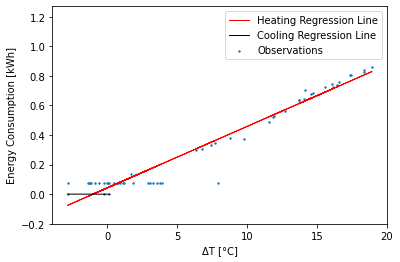

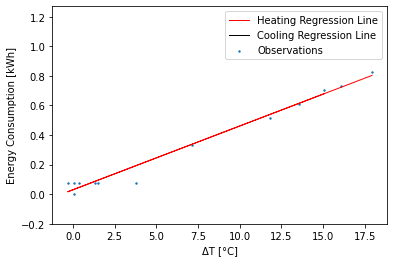

In [25]:
es_plot(data)
es_plot(dataD)
es_plot(dataW)
es_plot(dataM)